In [28]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\boubakar\Documents\Master_projet\data\insitu\output\dano_basin\bankandi_2012_2019.csv")

In [10]:
missing_pourcentage = dataset.isnull().mean() * 100
missing_number = dataset.isnull().sum()
print("Donnée de Bankandi 2012 2019")
print("Nombre de ligne : " +str(len(dataset)))
print("")
print("Nombre le ligne manquant")
print(missing_number)

Donnée de Bankandi 2012 2019
Nombre de ligne : 70126

Nombre le ligne manquant
Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Doy                   0
Hour                  0
Rain_01_mm         6957
Rain_02_mm         6957
Air_Temp_Deg_C    18714
Rel_H_%           18714
Solar_R_W/m^2     24474
Wind_Sp_m/sec      6957
Wind_Dir_Deg       6957
longitude             0
latitude              0
dtype: int64


In [11]:
print("Pourcentage manquant pour chaque colonne")
print(missing_pourcentage)

Pourcentage manquant pour chaque colonne
Unnamed: 0         0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Doy                0.000000
Hour               0.000000
Rain_01_mm         9.920714
Rain_02_mm         9.920714
Air_Temp_Deg_C    26.686250
Rel_H_%           26.686250
Solar_R_W/m^2     34.900037
Wind_Sp_m/sec      9.920714
Wind_Dir_Deg       9.920714
longitude          0.000000
latitude           0.000000
dtype: float64


## Visualisation des valeurs manquantes

In [22]:
dataset = dataset.set_index(['Year', 'Month', 'Day', 'Hour'])
dataset.head()

Unnamed: 0  Doy  Rain_01_mm  Rain_02_mm  \
Year   Month Day Hour                                            
2012.0 1.0   1.0 1              0  1.0         NaN         NaN   
                 2              1  1.0         NaN         NaN   
                 3              2  1.0         NaN         NaN   
                 4              3  1.0         NaN         NaN   
                 5              4  1.0         NaN         NaN   

                       Air_Temp_Deg_C  Rel_H_%  Solar_R_W/m^2  Wind_Sp_m/sec  \
Year   Month Day Hour                                                          
2012.0 1.0   1.0 1                NaN      NaN            NaN            NaN   
                 2                NaN      NaN            NaN            NaN   
                 3                NaN      NaN            NaN            NaN   
                 4                NaN      NaN            NaN            NaN   
                 5                NaN      NaN            NaN            NaN   

                       Wind_Dir_Deg  longitude   latitude  
Year   Month Day Hour                                      
2012.0 1.0   1.0 1              NaN  -3.076739  11.246429  
                 2              NaN  -3.076739  11.246429  
                 3              NaN  -3.076739  11.246429  
                 4              NaN  -3.076739  11.246429  
                 5              NaN  -3.076739  11.246429

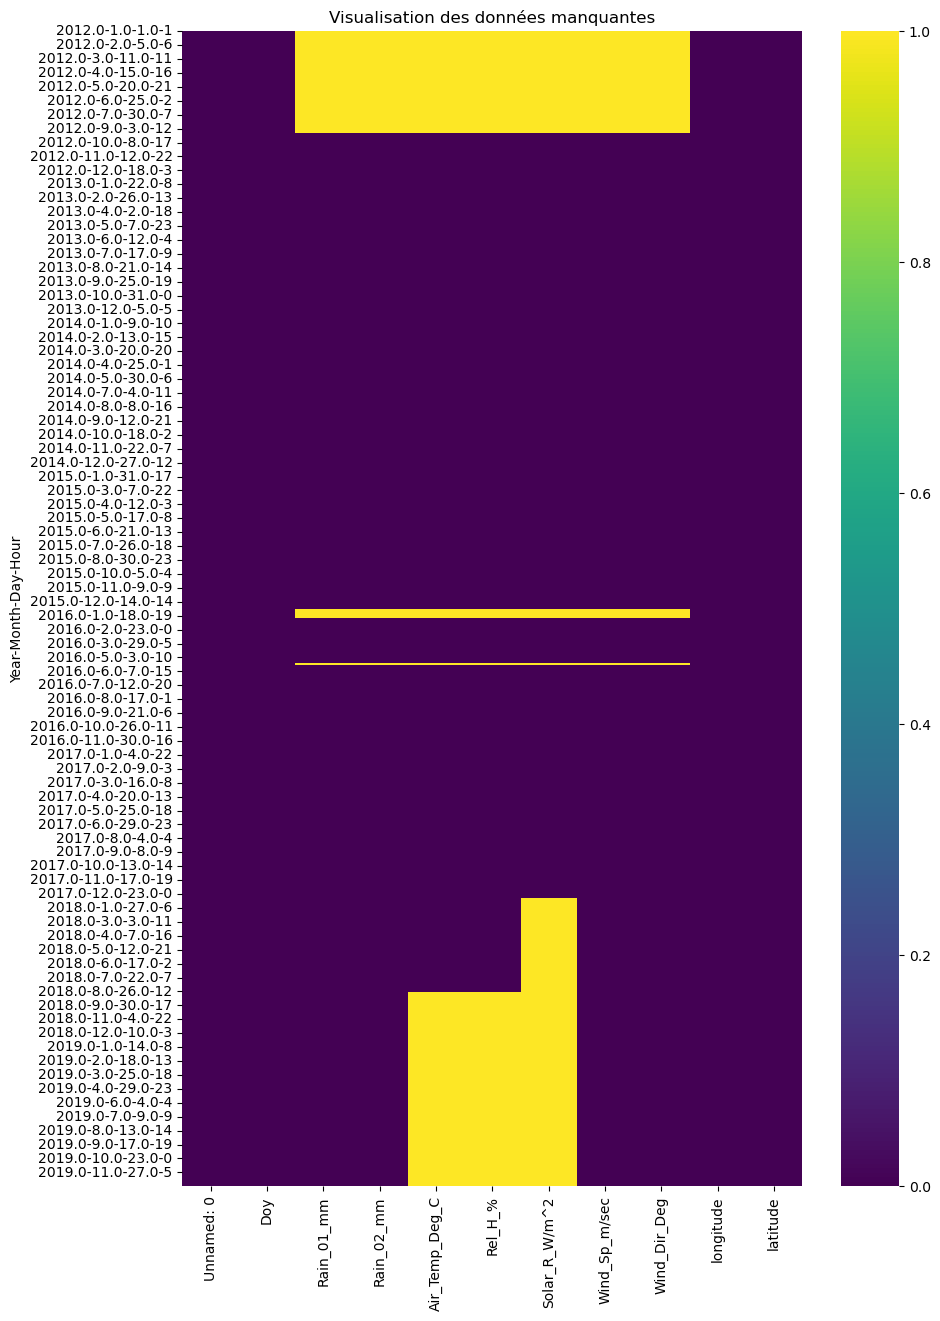

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
sns.heatmap(dataset.isnull(), cmap='viridis') #, cbar=False)
plt.title("Visualisation des données manquantes")
plt.show()

# Petite analyse temporelle

In [40]:
missing_by_month = dataset.groupby([dataset['Year'], dataset['Month']]).size().unstack()
print(missing_by_month)

Month    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0  \
Year                                                                           
2012.0  743.0  696.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2013.0  744.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2014.0  744.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2015.0  744.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2016.0  744.0  696.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2017.0  743.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2018.0  743.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2019.0  744.0  672.0  744.0  720.0  744.0  720.0  744.0  744.0  720.0  744.0   
2020.0    1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

Month    11.0   12.0  
Year                  
2012.0  720.0  744.0  
2013.0  720.0  744.0  
2014.0  720.0  744.0  
2015

<Figure size 2000x1000 with 0 Axes>

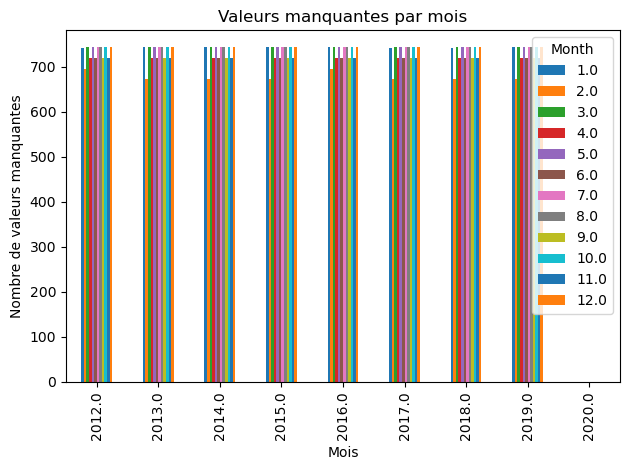

In [43]:
plt.figure(figsize=(20, 10))
missing_by_month.plot(kind='bar')
plt.title('Valeurs manquantes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de valeurs manquantes')
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

data = {
    'col1': [1, 2, 3, 4],
    'col2': ['a', 'b', 'c', 'd'],
    'col3': [True, False, True, False],
}

df = pd.DataFrame(data)

if 'col1' in df.columns and 'col2' in df.columns:
    values_list = (df['col1'][1], df['col2'][1])
    print(values_list)
else:
    print("NOn non non")

(2, 'b')


In [63]:
import pandas as pd

import os
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Chemin du dossier à parcourir
dossier = r"C:\Users\boubakar\Documents\Master_projet\data\insitu\output/"

# Extension des fichiers à rechercher (par exemple, ".txt")
extension_recherchee = ".csv"

# Liste pour stocker les chemins des fichiers trouvés
chemins_fichiers = []
long_lat_list = []

# Parcourir le dossier
for dossier_racine, sous_dossiers, fichiers in os.walk(dossier):
    for fichier in fichiers:
        if fichier.endswith(extension_recherchee):
            chemin_complet = os.path.join(dossier_racine, fichier)
            chemins_fichiers.append(chemin_complet)

            temp_df = pd.read_csv(chemin_complet)
            if 'longitude' in temp_df.columns and 'latitude' in temp_df.columns:
                long_lat_list.append([fichier, temp_df['longitude'][5], temp_df['latitude'][5]])

In [64]:
df_long_lat = pd.DataFrame(long_lat_list)

In [65]:
df_long_lat.head()

,0,1,2
0,bankandi_2012_2019.csv,-3.076739,11.246429
1,bankandi_2020_2023.csv,-3.076739,11.246429
2,fafo_2013_2019.csv,-3.023527,11.327129
3,fafo_2020_2022.csv,-3.023527,11.327129
4,fondation_2012_2019.csv,-3.075492,11.163541


In [68]:
nouveaux_noms = {0: 'Fichier', 1: 'longitude', 2: 'latitude'}
df_long_lat = df_long_lat.rename(columns=nouveaux_noms)

In [69]:
df_long_lat.head()

,Fichier,longitude,latitude
0,bankandi_2012_2019.csv,-3.076739,11.246429
1,bankandi_2020_2023.csv,-3.076739,11.246429
2,fafo_2013_2019.csv,-3.023527,11.327129
3,fafo_2020_2022.csv,-3.023527,11.327129
4,fondation_2012_2019.csv,-3.075492,11.163541


In [70]:
df_long_lat.describe()

,longitude,latitude
count,46.000000,46.000000
mean,-2.961402,11.006949
std,1.446733,0.226993
min,-4.932770,10.477846
25%,-4.486023,10.827053
50%,-3.073127,10.972921
75%,-1.703394,11.192883
max,-0.782754,11.366513


In [71]:
df_long_lat = df_long_lat.drop_duplicates(subset=['longitude', 'latitude'], keep='first')

In [72]:
df_long_lat.head()

,Fichier,longitude,latitude
0,bankandi_2012_2019.csv,-3.076739,11.246429
2,fafo_2013_2019.csv,-3.023527,11.327129
4,fondation_2012_2019.csv,-3.075492,11.163541
6,lare_2013_2019.csv,-3.095351,11.192883
8,tambiri_2012_2019.csv,-2.978072,11.183947


In [73]:
df_long_lat.describe()

,longitude,latitude
count,30.000000,30.000000
mean,-2.816129,10.996309
std,1.458790,0.238398
min,-4.932770,10.477846
25%,-3.457300,10.827053
50%,-3.000800,10.943967
75%,-1.477248,11.190649
max,-0.782754,11.366513


In [74]:
df_long_lat.to_csv("coordonnee_bassin_station.csv")

In [75]:
df_long_lat.to_excel("coordonnee_bassin_station.xlsx", index=False)